In [36]:
%load_ext autoreload
%autoreload 2
from configs import project_config
import matplotlib.pyplot as plt
import os
import numpy as np
from configs.RecursiveVPSDE.LSTM_fQuadSinHF.recursive_LSTM_PostMeanScore_fQuadSinHF_T256_H05_tl_110data import \
    get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
config = get_config()

In [38]:
def rmse_ignore_nans(y_true, y_pred):
    assert (y_true.shape == y_pred.shape and len(y_pred.shape) == 1)
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)  # Ignore NaNs in both arrays
    return np.sqrt(np.mean((y_true[mask] - y_pred[mask]) ** 2))

def extract_bw_number(s):
    match = s.split("/")[-1].split("_")[3][:-2]
    return float("0." + match)

In [39]:
minx = -1.2
maxx = -minx
ts_type = "fQuadSin"
vispaths = np.linspace(minx, maxx, 256)
is_true_drift = -2.*config.quad_coeff * vispaths.flatten() + config.sin_coeff * config.sin_space_scale*np.sin(config.sin_space_scale*vispaths.flatten())

In [40]:
def keep_files(test_to_include):
    keepfiles = []
    root_dir = project_config.ROOT_DIR + f"experiments/results/"
    for file in os.listdir(root_dir):
        print(file, test_to_include, test_to_include in file)
        print(test_to_include in file and test_to_include in file)
        print("\n")
        if "Nadaraya" in file and ts_type in file and test_to_include in file and test_to_include in file:
            keepfiles.append(root_dir+file)
    print(len(keepfiles), ts_type)
    assert len(keepfiles)>0, "No files found"
    keepfiles = sorted(keepfiles, key=extract_bw_number)
    Xshape = np.load(keepfiles[0]).shape[0]
    return keepfiles, Xshape

In [41]:
tests = [[1./256, 64]] #[[1./64, 256],[1./256, 256],[1./64, 64], [1./256, 64]]

In [42]:
files = []
for t in tests:
    print(t)
    include_for_test = (f"{t[0]:.3e}dT_{config.quad_coeff}a_{config.sin_coeff}b_{config.sin_space_scale}c_{t[1]}NumDPS").replace(".", "")
    fs, k = keep_files(test_to_include=include_for_test)
    assert (k == 256)
    files.append(fs)


[0.00390625, 64]
IIDNadaraya_fQuadSinHF_DriftEvalExp_00504bw_10952NPaths_00t0_1562e-02dT_05a_004b_250c_256NumDPS_isdriftHats.npy 3906e-03dT_05a_004b_250c_64NumDPS False
False


IIDNadaraya_fQuadSinHF_DriftEvalExp_00004bw_10952NPaths_00t0_1562e-02dT_05a_004b_250c_64NumDPS_isdriftHats.npy 3906e-03dT_05a_004b_250c_64NumDPS False
False


IIDNadaraya_fQuadSinHF_DriftEvalExp_01313bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_256NumDPS_isdriftHats.npy 3906e-03dT_05a_004b_250c_64NumDPS False
False


early_stopping 3906e-03dT_05a_004b_250c_64NumDPS False
False


IIDNadaraya_fQuadSinHF_DriftEvalExp_08913bw_10952NPaths_00t0_3906e-03dT_05a_004b_250c_64NumDPS_isdriftHats.npy 3906e-03dT_05a_004b_250c_64NumDPS True
True


IIDNadaraya_f4DLnz_DriftEvalExp_02159bw_10952NPaths_00t0_3906e-03dT_global_states.npy 3906e-03dT_05a_004b_250c_64NumDPS False
False


IIDNadaraya_f4DLnz_DriftEvalExp_08913bw_10952NPaths_00t0_3906e-03dT_true_states.npy 3906e-03dT_05a_004b_250c_64NumDPS False
False


TSPM_LSTM_4DLorenz

0 20
(256,) (256,)


RuntimeError: 

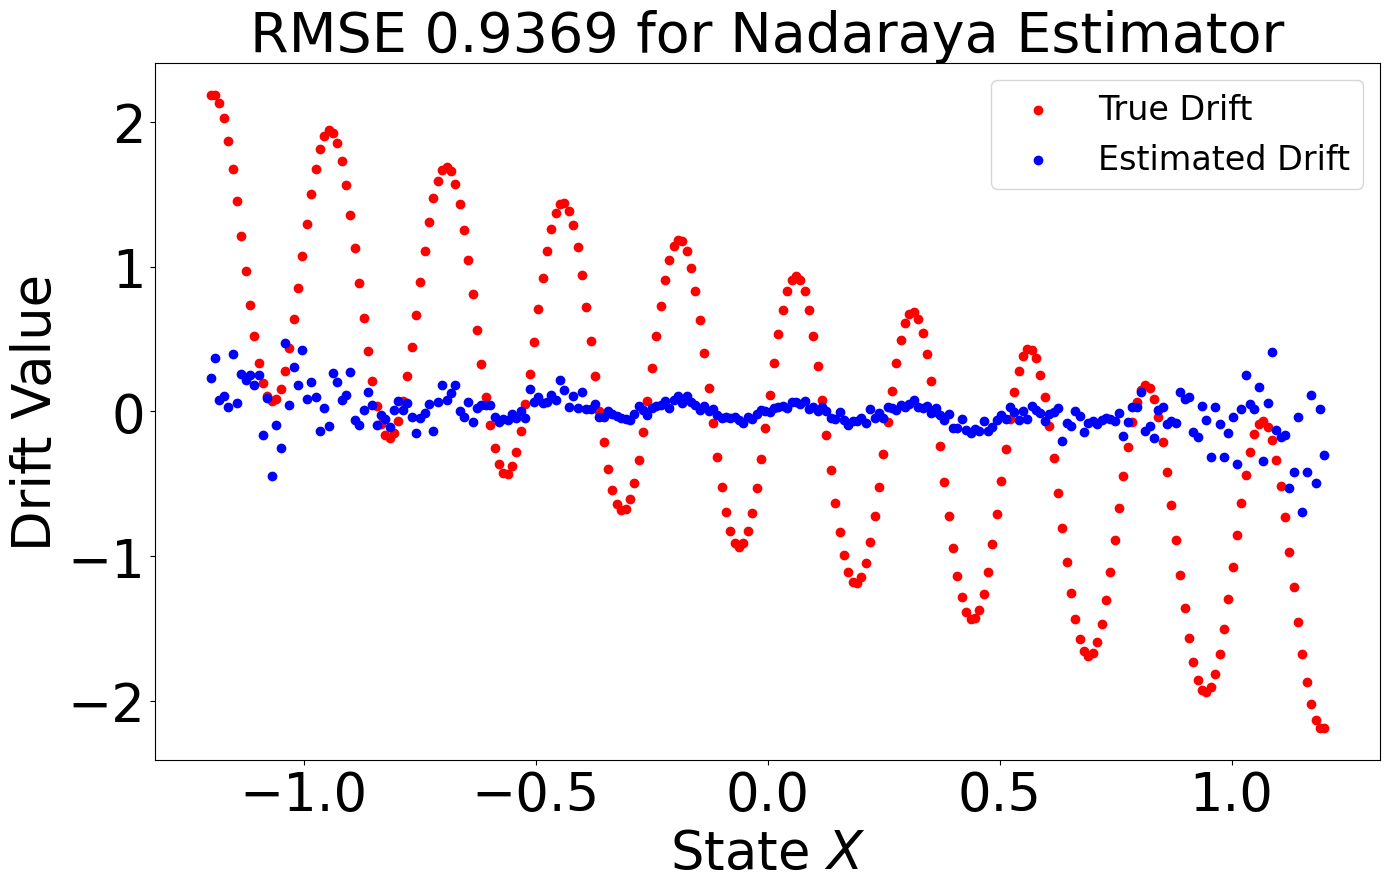

In [44]:
bws = np.logspace(-4, -0.05, 20)
legends = ["dT 1/256, n 64"]#["dT 1/64, n 256","dT 1/64, n 64", "dT 1/256, n 256", "dT 1/256, n 64"]
rmses = {l:[] for l in legends}
for i, fs in enumerate(files):
    print(i, len(fs))
    for k in range(len(fs)):
        f = fs[k]
        try:
            is_drift = np.load(f).mean(axis=-1).flatten()
            print(is_drift.shape, is_true_drift.shape)
            bw = extract_bw_number(f)
            fig, ax = plt.subplots(figsize=(14,9))
            plt.scatter(vispaths, is_true_drift,label="True Drift", color="red")
            plt.scatter(vispaths, is_drift, label=f"Estimated Drift", color="blue")
            plt.legend(fontsize=18)
            rmse = (rmse_ignore_nans(is_true_drift, is_drift))
            plt.title(f"RMSE {round(rmse, 4)} for Nadaraya Estimator", fontsize=40)
            ax.tick_params(labelsize=38)
            plt.ylabel("Drift Value", fontsize=38)
            plt.xlabel(r"State $X$", fontsize=38)
            plt.legend(fontsize=24)
            plt.tight_layout()
            if k == len(fs) - 1 and i == 0:
                plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/{ts_type}2_IIDNadaraya_{1./64:.3e}dT_{256}NDT.png",  bbox_inches='tight')
            elif k == 9 and i == 1:
                plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/{ts_type}2_IIDNadaraya_{1./64:.3e}dT_{64}NDT.png",  bbox_inches='tight')
            elif k == 9 and i == 2:
                plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/{ts_type}2_IIDNadaraya_{1./256:.3e}dT_{256}NDT.png",  bbox_inches='tight')
            elif k == 0 and i == 3:
                plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/{ts_type}2_IIDNadaraya_{1./256:.3e}dT_{64}NDT.png",  bbox_inches='tight')
            plt.show()
            plt.close()
        except ValueError as e:
            plt.close()
            continue
    import time
    time.sleep(10)
    print("\n\n")

In [35]:
for i, t in enumerate(tests):
    print(f"{legends[i]}: {np.power((t[1]*bws**2), -1) <= 1}")

dT 1/64, n 256: [False False False False False False False False False False False False
 False False  True  True  True  True  True  True]
dT 1/64, n 64: [False False False False False False False False False False False False
 False False  True  True  True  True  True  True]
dT 1/256, n 256: [False False False False False False False False False False False False
 False False False  True  True  True  True  True]
